In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d amanansarii/rock-paper-scissors-images

 98% 150M/153M [00:02<00:00, 61.0MB/s]
100% 153M/153M [00:02<00:00, 59.7MB/s]


In [3]:
!ls

kaggle.json  rock-paper-scissors-images.zip  sample_data


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/rock-paper-scissors-images.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted!')

The dataset is extracted!


In [5]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

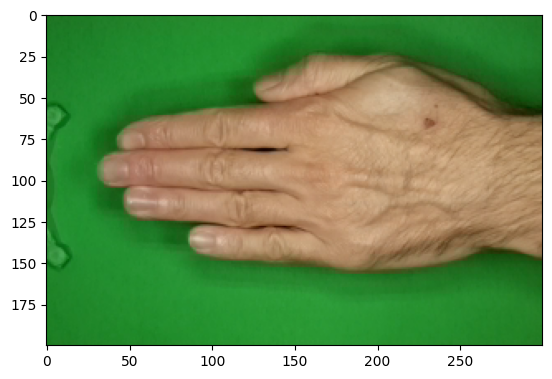

In [6]:
rock_img = mpimg.imread('/content/Data/paper (1).png')
imgplot = plt.imshow(rock_img)
plt.show()

In [7]:
import os

Renaming images name in the list

In [8]:
images_path = '/content/Data'

In [9]:
old_file_names = os.listdir(images_path)
print(old_file_names)

['paper (348).png', 'rock (636).png', 'scissors (156).png', 'scissors (655).png', 'paper (227).png', 'rock (155).png', 'scissors (96).png', 'scissors (217).png', 'rock (70).png', 'rock (349).png', 'rock (91).png', 'scissors (594).png', 'rock (228).png', 'rock (79).png', 'scissors (535).png', 'scissors (645).png', 'paper (283).png', 'scissors (657).png', 'rock (213).png', 'scissors (360).png', 'paper (286).png', 'paper (136).png', 'paper (673).png', 'scissors (336).png', 'scissors (168).png', 'scissors (739).png', 'rock (704).png', 'paper (507).png', 'scissors (647).png', 'paper (465).png', 'rock (309).png', 'paper (60).png', 'scissors (125).png', 'scissors (485).png', 'paper (446).png', 'rock (323).png', 'scissors (243).png', 'rock (38).png', 'paper (102).png', 'scissors (340).png', 'rock (152).png', 'rock (197).png', 'paper (40).png', 'scissors (687).png', 'paper (45).png', 'rock (102).png', 'rock (14).png', 'rock (577).png', 'scissors (101).png', 'rock (535).png', 'scissors (141).png

In [10]:
len(old_file_names)

2188

In [11]:
file_names = []

In [12]:
for old_file_name in old_file_names:
  file_names.append(old_file_name.replace(' ', '_'))

In [13]:
print(file_names)

['paper_(348).png', 'rock_(636).png', 'scissors_(156).png', 'scissors_(655).png', 'paper_(227).png', 'rock_(155).png', 'scissors_(96).png', 'scissors_(217).png', 'rock_(70).png', 'rock_(349).png', 'rock_(91).png', 'scissors_(594).png', 'rock_(228).png', 'rock_(79).png', 'scissors_(535).png', 'scissors_(645).png', 'paper_(283).png', 'scissors_(657).png', 'rock_(213).png', 'scissors_(360).png', 'paper_(286).png', 'paper_(136).png', 'paper_(673).png', 'scissors_(336).png', 'scissors_(168).png', 'scissors_(739).png', 'rock_(704).png', 'paper_(507).png', 'scissors_(647).png', 'paper_(465).png', 'rock_(309).png', 'paper_(60).png', 'scissors_(125).png', 'scissors_(485).png', 'paper_(446).png', 'rock_(323).png', 'scissors_(243).png', 'rock_(38).png', 'paper_(102).png', 'scissors_(340).png', 'rock_(152).png', 'rock_(197).png', 'paper_(40).png', 'scissors_(687).png', 'paper_(45).png', 'rock_(102).png', 'rock_(14).png', 'rock_(577).png', 'scissors_(101).png', 'rock_(535).png', 'scissors_(141).png

Renaming images name in the actual folder

In [14]:
folder_path = "/content/Data"  # Replace with the actual path to your "Data" folder
os.chdir(folder_path)

# List all the files in the "Data" folder
file_list = os.listdir()

for old_file_name in file_list:
  new_file_name = old_file_name.replace(' ', '_')
  os.rename(old_file_name, new_file_name)

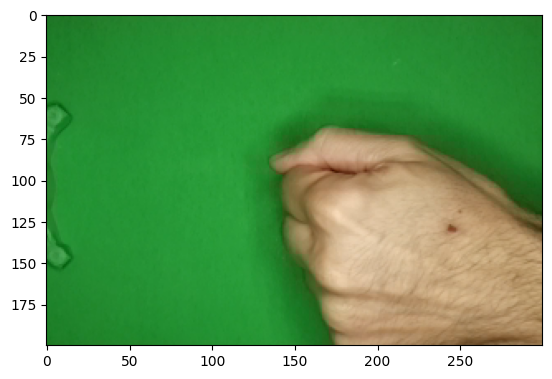

In [15]:
# Displaying an image of rock
rock_img = mpimg.imread('/content/Data/rock_(53).png')
imgplot = plt.imshow(rock_img)
plt.show()

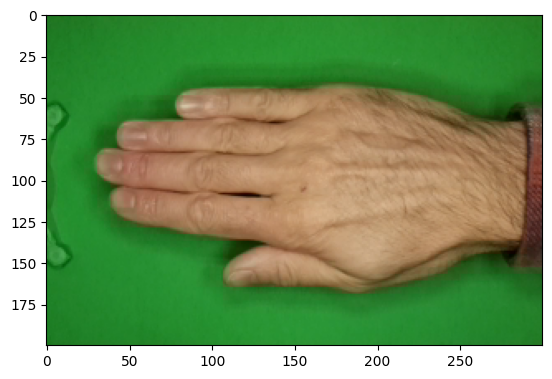

In [16]:
# Displaying an image of paper
paper_img = mpimg.imread('/content/Data/paper_(27).png')
imgplot = plt.imshow(paper_img)
plt.show()

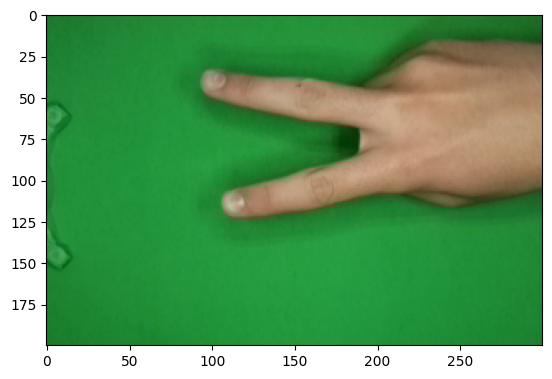

In [17]:
# Displaying an image of scissors
scissors_img = mpimg.imread('/content/Data/scissors_(570).png')
imgplot = plt.imshow(scissors_img)
plt.show()

In [18]:
# Calculating the no. of images for each rock paper scissors
paper_count, rock_count, scissors_count = 0, 0, 0
for file_name in file_names:
  if file_name[:5] == 'paper':
    paper_count += 1
  elif file_name[:4] == 'rock':
    rock_count += 1
  elif file_name[:8] == 'scissors':
    scissors_count += 1

print(f"Number of Paper Images: {paper_count} \nNumber of Rock Images: {rock_count} \nNumber of Scissors Images: {scissors_count}")

Number of Paper Images: 712 
Number of Rock Images: 726 
Number of Scissors Images: 750


All the images are of shape 300 x 200, will resize them to 224 x 224.


In [19]:
# Creating a directory to store resized images
os.mkdir('/content/image_resized')

In [20]:
original_folder = '/content/Data/'
resized_folder = '/content/image_resized/'

In [21]:
for i in range(len(file_names)):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder + filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  new_img_path = resized_folder + filename
  img.save(new_img_path)

After Resizing

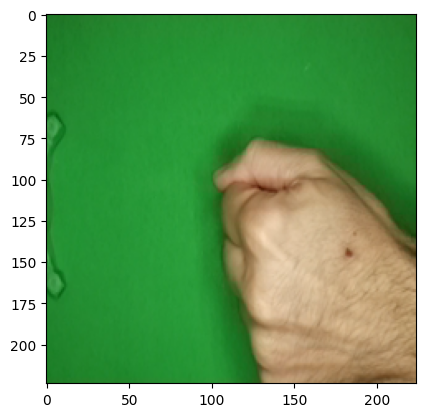

In [22]:
# Displaying an image of rock
rock_img = mpimg.imread('/content/image_resized/rock_(53).png')
imgplot = plt.imshow(rock_img)
plt.show()

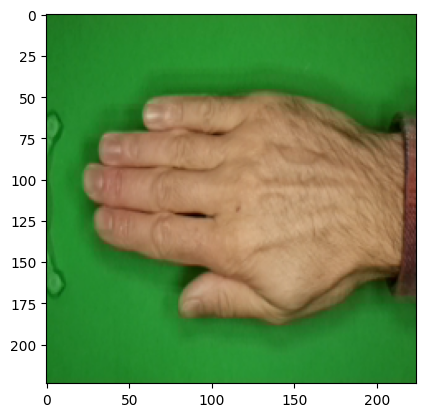

In [23]:
# Displaying an image of paper
paper_img = mpimg.imread('/content/image_resized/paper_(27).png')
imgplot = plt.imshow(paper_img)
plt.show()

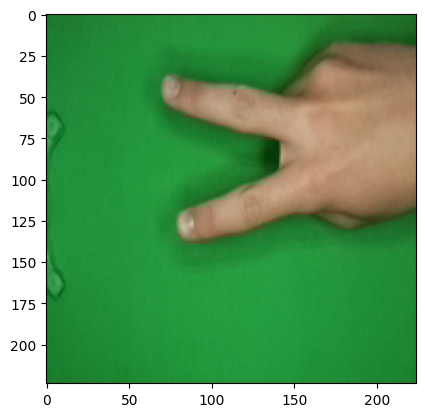

In [24]:
# Displaying an image of scissors
scissors_img = mpimg.imread('/content/image_resized/scissors_(570).png')
imgplot = plt.imshow(scissors_img)
plt.show()

Creating Labels for Rock, Paper and Scissors resized Images.

In [25]:
# New file path for resized images
file_names = os.listdir('/content/image_resized/')

In [26]:
# paper = 0, rock = 1, scissors = 2

labels = []
for i in range(len(file_names)):
  file_name = file_names[i]

  if file_name[:5] == 'paper':
    labels.append(0)
  elif file_name[:4] == 'rock':
    labels.append(1)
  elif file_name[:8] == 'scissors':
    labels.append(2)

In [27]:
print(file_names[:5])
print(f"Length: {len(file_names)}")

['rock_(585).png', 'scissors_(607).png', 'rock_(20).png', 'paper_(40).png', 'scissors_(690).png']
Length: 2188


In [28]:
print(labels[:5])
print(f"Length: {len(labels)}")

[1, 2, 1, 0, 2]
Length: 2188


In [29]:
# Counting the no. images of paper, rock and scissors out of 2188 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1 2]
[712 726 750]


Converting all the resized images to numpy arrays.

In [30]:
import cv2
import glob

In [31]:
image_directory = '/content/image_resized/'
image_extension = ['png', 'jpg']

files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

rps_images = np.array([cv2.imread(file) for file in files])

In [32]:
print(rps_images)

[[[[  8 106  43]
   [  9 107  44]
   [  8 108  45]
   ...
   [ 17  45  61]
   [ 17  45  61]
   [ 23  51  68]]

  [[  7 106  40]
   [  8 107  41]
   [  8 109  42]
   ...
   [ 13  41  56]
   [ 15  44  59]
   [ 19  49  63]]

  [[  8 107  41]
   [  9 108  42]
   [  8 109  43]
   ...
   [ 14  44  58]
   [ 16  45  59]
   [ 20  49  63]]

  ...

  [[ 15 117  42]
   [ 16 117  44]
   [ 14 118  43]
   ...
   [ 26 130  50]
   [ 24 131  50]
   [ 25 129  51]]

  [[ 16 118  43]
   [ 17 119  44]
   [ 15 119  43]
   ...
   [ 24 129  49]
   [ 24 131  50]
   [ 25 129  51]]

  [[ 15 119  43]
   [ 17 120  44]
   [ 15 119  43]
   ...
   [ 23 129  48]
   [ 25 129  49]
   [ 24 128  49]]]


 [[[ 40 118  35]
   [ 41 119  36]
   [ 43 121  38]
   ...
   [ 53 104  98]
   [ 50 102  96]
   [ 49  99  93]]

  [[ 40 118  35]
   [ 42 120  37]
   [ 41 120  35]
   ...
   [ 50 127  47]
   [ 48 125  45]
   [ 50 125  46]]

  [[ 40 118  35]
   [ 42 120  37]
   [ 41 119  34]
   ...
   [ 48 129  38]
   [ 48 129  37]
   [ 51 129

In [33]:
type(rps_images)

numpy.ndarray

In [34]:
rps_images.shape

(2188, 224, 224, 3)

In [35]:
X = rps_images
Y = np.asarray(labels)

In [36]:
type(Y)

numpy.ndarray

**Train Test Split**

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [38]:
print(X.shape, X_train.shape, X_test.shape)

(2188, 224, 224, 3) (1750, 224, 224, 3) (438, 224, 224, 3)


Scaling the Data

In [39]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [40]:
X_train_scaled

array([[[[0.16862745, 0.49803922, 0.15294118],
         [0.16470588, 0.49411765, 0.14901961],
         [0.16470588, 0.49411765, 0.14901961],
         ...,
         [0.16862745, 0.49803922, 0.15294118],
         [0.16862745, 0.49803922, 0.15294118],
         [0.17254902, 0.49803922, 0.1372549 ]],

        [[0.15686275, 0.50196078, 0.14117647],
         [0.16078431, 0.50588235, 0.14117647],
         [0.16470588, 0.50588235, 0.14117647],
         ...,
         [0.16862745, 0.50196078, 0.14509804],
         [0.16470588, 0.49803922, 0.14117647],
         [0.15294118, 0.49019608, 0.12941176]],

        [[0.15686275, 0.50196078, 0.13333333],
         [0.16078431, 0.50588235, 0.14117647],
         [0.16862745, 0.50588235, 0.14117647],
         ...,
         [0.17254902, 0.50588235, 0.14901961],
         [0.16470588, 0.49803922, 0.14509804],
         [0.16078431, 0.49803922, 0.13333333]],

        ...,

        [[0.16470588, 0.51764706, 0.1372549 ],
         [0.16470588, 0.51764706, 0.1372549 ]

## Building the Neural Network

In [41]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub

MobileNet

In [42]:
MobileNet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(MobileNet_model, input_shape=(224, 224, 3), trainable=False)

In [43]:
num_of_classes = 3

model = tf.keras.Sequential(
    [
        pretrained_model,
        tf.keras.layers.Dense(num_of_classes)
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 2261827 (8.63 MB)
Trainable params: 3843 (15.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [44]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [45]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
55/55 [==============================] - 14s 50ms/step - loss: 0.2399 - acc: 0.9371
Epoch 2/5
55/55 [==============================] - 2s 44ms/step - loss: 0.0475 - acc: 0.9943
Epoch 3/5
55/55 [==============================] - 2s 41ms/step - loss: 0.0297 - acc: 0.9971
Epoch 4/5
55/55 [==============================] - 2s 41ms/step - loss: 0.0198 - acc: 0.9983
Epoch 5/5
55/55 [==============================] - 2s 40ms/step - loss: 0.0149 - acc: 0.9989


In [46]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print(f"Test loss: {score}")
print(f"Test Accuracy: {acc}")

14/14 [==============================] - 3s 57ms/step - loss: 0.0235 - acc: 0.9932
Test loss: 0.02349829487502575
Test Accuracy: 0.9931507110595703


## Predictive System

In [47]:
def predictive_system():
  input_img_path = input('Path of the image to be Predicted: ')

  input_img = cv2.imread(input_img_path)

  cv2_imshow(input_img)

  input_img_resize = cv2.resize(input_img, (224, 224))

  input_img_scaled = input_img_resize / 255

  img_reshaped = np.reshape(input_img_scaled, [1, 224, 224, 3])

  input_pred = model.predict(img_reshaped)

  input_pred_label = np.argmax(input_pred)

  if input_pred_label == 0:
    print("PAPER")
  elif input_pred_label == 1:
    print("ROCK")
  else:
    print("SCISSOR")

Path of the image to be Predicted: /content/paper.jpg


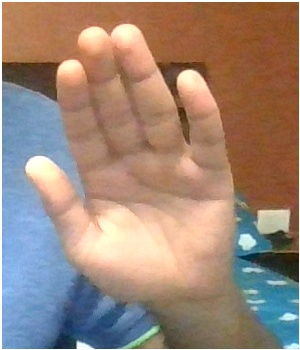

1/1 [==============================] - 0s 27ms/step
PAPER


In [49]:
predictive_system()